In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
%matplotlib notebook

import keras

from keras.layers import Convolution2D, Flatten, Dense, MaxPool2D, Activation, Dropout
from keras.models import Sequential
from keras.utils import np_utils



In [45]:
dirs = os.listdir('./Desktop/Major Project/Datasets/')
path = './Desktop/Major Project/Datasets/'
flag=0
labels = []
lab=[]
langName = []

In [46]:
c = 0
x = 0
lanc = 0
imgarr = []

for i in dirs:
    
    
    
    if(i[0]=='.'):
        continue
   

    print(i)
    st = path+i
    flag = 0
    
    
    if(i=='English'):
        
        flag = 1
    
    
    
    for j in os.listdir(st):
        
        
        if(j[0]=='.'):
            continue
            
        st2 = st+'/'+j
        x = x+1
        
        for k in os.listdir(st2):
            
            if(k[0]=='.'):
                continue
            
            img = cv2.imread(st2+'/'+k, 0)
            
            #print (img.shape)
            
#             kernel = np.ones((2,2),np.uint8)
#             img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
            
            
            
            
            random , img = cv2.threshold(img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
            
            finimg = img
            
            if(flag==1):
            
                image, contours, hierarchy = cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

                maxa = 0
                maxx = 0
                maxy = 0
                maxw,maxh=0,0

                for contour in contours:
                # get rectangle bounding contour
                    [x, y, w, h] = cv2.boundingRect(contour)

                    if(w*h>maxa):

                        maxa,maxx,maxy,maxw,maxh = w*h,x,y,w,h
                        
                    

                
                finimg = img[maxy:maxy+maxh,maxx:maxx+maxw]
                
                
            else:
                
                kernel = np.ones((2,2),np.uint8)
                finimg = cv2.dilate(finimg,kernel,iterations = 1)
                

            finimg = cv2.resize(finimg, dsize=(50, 50), interpolation=cv2.INTER_CUBIC)

            random , finimg = cv2.threshold(finimg,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

            c = c+1

            
            labels.append(i+j)
            lab.append(x)
            imgarr.append(finimg)
            langName.append(lanc)
            
    lanc = lanc+1        
    

Hindi
English
Tamil


In [47]:

labs = np_utils.to_categorical(langName)
labs.shape

(26501, 3)

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [48]:
np.unique(langName,return_counts=True)

(array([0, 1, 2]), array([12691,  3410, 10400]))

In [33]:
langName[26000]

3

<IPython.core.display.Javascript object>


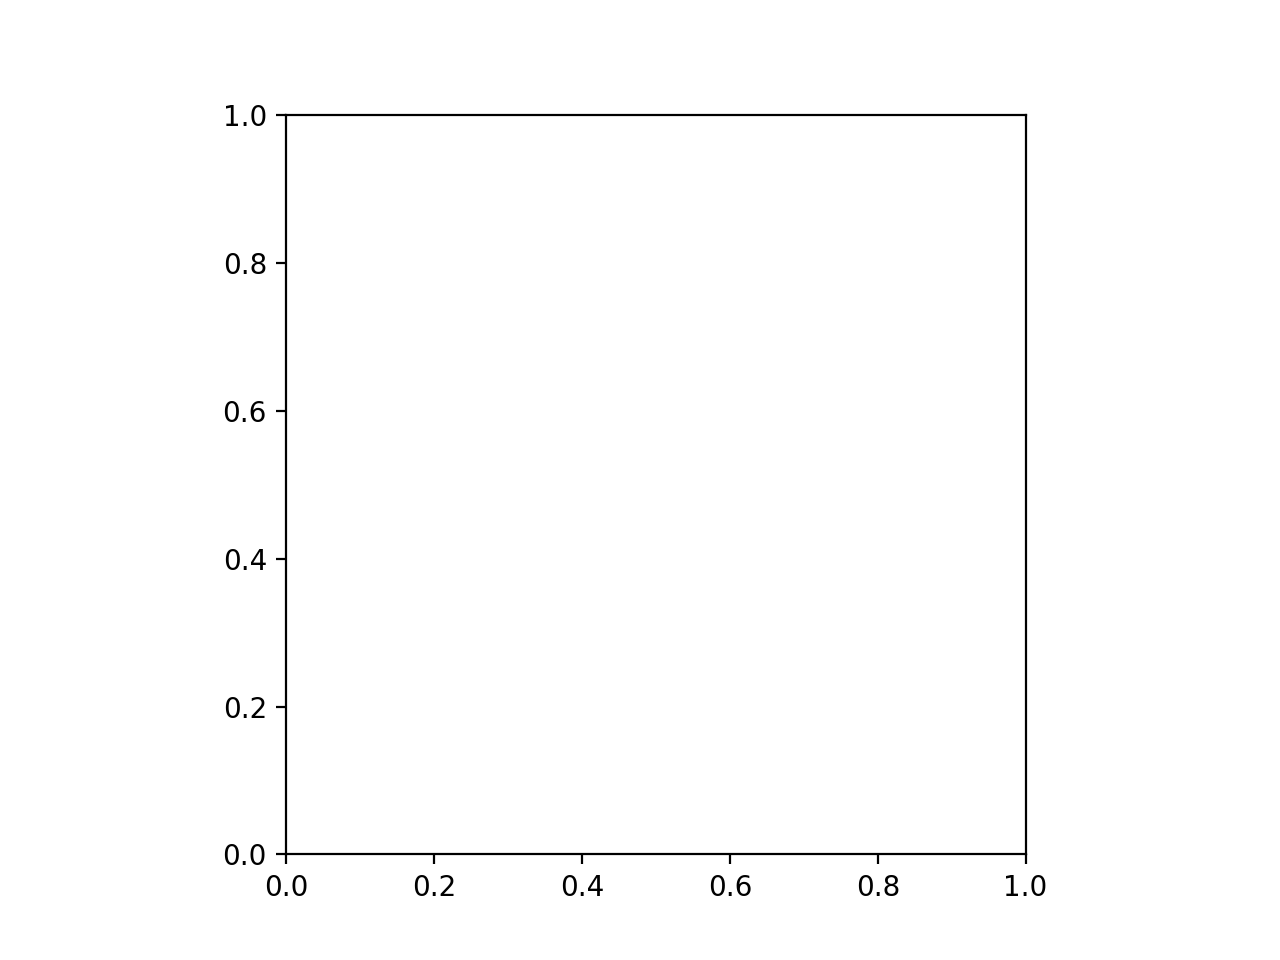

TypeError: Invalid dimensions for image data

In [70]:
plt.imshow(imgarr[15500])
print(labels[16000])

In [49]:

imgarr = np.array(imgarr).reshape((len(imgarr), 50, 50, 1))


In [50]:
model = Sequential()

model.add(Convolution2D(32, (3, 3), input_shape=(50, 50, 1)))
model.add(Activation('relu'))

model.add(Convolution2D(16, (3, 3)))
model.add(Activation('relu'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(8, (3, 3)))
model.add(Activation('relu'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.4))

model.add(Dense(labs.shape[1]))
model.add(Activation('softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
activation_19 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 46, 46, 16)        4624      
_________________________________________________________________
activation_20 (Activation)   (None, 46, 46, 16)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 23, 23, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 21, 21, 8)         1160      
_________________________________________________________________
activation_21 (Activation)   (None, 21, 21, 8)         0         
__________

In [51]:
imgarr.shape

(26501, 50, 50, 1)

In [52]:
hist = model.fit(imgarr, labs,
                epochs=10,
                shuffle=True,
                batch_size=100,
                validation_split=0.2)

Train on 21200 samples, validate on 5301 samples
Epoch 1/10
21200/21200 [==============================] - 37s 2ms/step - loss: 6.5159 - acc: 0.5922 - val_loss: 9.8987 - val_acc: 0.3545
Epoch 2/10
21200/21200 [==============================] - 36s 2ms/step - loss: 1.4634 - acc: 0.7114 - val_loss: 1.0995 - val_acc: 0.5684
Epoch 3/10
21200/21200 [==============================] - 36s 2ms/step - loss: 0.4755 - acc: 0.8137 - val_loss: 1.0071 - val_acc: 0.6470
Epoch 4/10
21200/21200 [==============================] - 36s 2ms/step - loss: 0.3606 - acc: 0.8599 - val_loss: 0.8752 - val_acc: 0.6976
Epoch 5/10
21200/21200 [==============================] - 36s 2ms/step - loss: 0.3027 - acc: 0.8840 - val_loss: 0.7151 - val_acc: 0.7648
Epoch 6/10
21200/21200 [==============================] - 36s 2ms/step - loss: 0.2543 - acc: 0.9044 - val_loss: 0.7938 - val_acc: 0.7557
Epoch 7/10
21200/21200 [==============================] - 36s 2ms/step - loss: 0.2182 - acc: 0.9205 - val_loss: 0.8258 - val_acc:

In [69]:
Image=cv2.imread('./Downloads/tt2.jpeg', 0)
I=Image.copy()

i=Image.copy()
G_Image=Image

print(i.shape)
chars = []

#Otsu Thresholding
blur = cv2.GaussianBlur(G_Image,(1,1),0)
ret,th = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
image, contours, hierarchy = cv2.findContours(th,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
#img = cv2.drawContours(Image, contours, -1, (0,255,0), 3)

for contour in contours:
        # get rectangle bounding contour
        [x, y, w, h] = cv2.boundingRect(contour)
        
        chars.append((x,y,w,h))

        if h>20:
            continue


pred = {}

for n in range(len(chars)):
    
    finimg = i[chars[n][1]:chars[n][1]+chars[n][3], chars[n][0]:chars[n][0]+chars[n][2]]
    
    if(finimg.shape[0]*finimg.shape[1]>120):
        
        finimg = finimg.astype('uint8')
        random, finimg = cv2.threshold(finimg,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
        finimg = cv2.resize(finimg, dsize=(50, 50), interpolation=cv2.INTER_CUBIC)
        random , finimg = cv2.threshold(finimg,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        
        finimg = np.array(finimg).reshape(( -1,50, 50, 1))
        
        try:
            pred[np.argmax(model.predict(finimg))]=pred[np.argmax(model.predict(finimg))]+1
            
        except:
            pred[np.argmax(model.predict(finimg))]=1
        
        
print(pred)

(800, 600)
{0: 215, 2: 249, 1: 28}
